<a href="https://colab.research.google.com/github/james-lucius/qworld/blob/main/QB52_D04_Order_Finding_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://qworld.net" target="_blank" align="left"><img src="https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/images/header.jpg" align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\Y}{ \mymatrix{rr}{0 & -i \\ i & 0} } $
$ \newcommand{\S}{ \mymatrix{rr}{1 & 0 \\ 0 & i} } $
$ \newcommand{\T}{ \mymatrix{rr}{1 & 0 \\ 0 & e^{i \frac{\pi}{4}}} } $
$ \newcommand{\Sdg}{ \mymatrix{rr}{1 & 0 \\ 0 & -i} } $
$ \newcommand{\Tdg}{ \mymatrix{rr}{1 & 0 \\ 0 & e^{-i \frac{\pi}{4}}} } $
$ \newcommand{\qgate}[1]{ \mathop{\textit{#1} } }$
$\newcommand{\Mod}[1]{\ (\mathrm{mod}\ #1)}$

_prepared by Özlem Salehi and Abuzer Yakaryilmaz_
<br><br>
_Cirq adaptation by Claudia Zendejas-Morales_

<font size="28px" style="font-size:28px;" align="left"><b> Order Finding Algorithm </b></font>
<br>
<br><br>

##### <font color="#08b806">Please execute the following cell, it is necessary to distinguish between your local environment and Google Colab's

In [1]:
import IPython

def in_colab():
    try:
        import google.colab
        return True
    except:
        return False

path_files = "./" if in_colab() else "../qworld/include/"

SolutionToTask1 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1vmO57cdCWd9MPl4K9zQ5lx2pqnwv3Zz_?usp=sharing#scrollTo=V1hSncbJg9re' if in_colab() else 'QB52_D04_Order_Finding_Algorithm_Solutions.ipynb#task1')))
SolutionToTask2 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1vmO57cdCWd9MPl4K9zQ5lx2pqnwv3Zz_?usp=sharing#scrollTo=zo5SZP_Gg9rf' if in_colab() else 'QB52_D04_Order_Finding_Algorithm_Solutions.ipynb#task2')))
SolutionToTask3 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1vmO57cdCWd9MPl4K9zQ5lx2pqnwv3Zz_?usp=sharing#scrollTo=SBXhjqJAg9rf' if in_colab() else 'QB52_D04_Order_Finding_Algorithm_Solutions.ipynb#task3')))
SolutionToTask4 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1vmO57cdCWd9MPl4K9zQ5lx2pqnwv3Zz_?usp=sharing#scrollTo=oSVPnHg5g9rg' if in_colab() else 'QB52_D04_Order_Finding_Algorithm_Solutions.ipynb#task4')))
SolutionToTask5 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1vmO57cdCWd9MPl4K9zQ5lx2pqnwv3Zz_?usp=sharing#scrollTo=jCltmUh5g9rg' if in_colab() else 'QB52_D04_Order_Finding_Algorithm_Solutions.ipynb#task5')))
SolutionToTask6 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1vmO57cdCWd9MPl4K9zQ5lx2pqnwv3Zz_?usp=sharing#scrollTo=0qR1Xnjjg9rh' if in_colab() else 'QB52_D04_Order_Finding_Algorithm_Solutions.ipynb#task6')))

if in_colab():
    url = "https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/shor.py"
    !wget --no-cache -O shor.py {url}

    !pip install cirq

--2025-07-16 22:19:46--  https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/shor.py
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 569 [text/plain]
Saving to: ‘shor.py’

shor.py             100%[===================>]     569  --.-KB/s    in 0s      

2025-07-16 22:19:46 (233 MB/s) - ‘shor.py’ saved [569/569]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 597.5/597.5 kB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 425.1/425.1 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 90.9 MB/s eta 0:00:00


##### For positive integers $ x $ and $ N $ where $x<N$ with no common factors, order of $x$ is the smallest (least) positive integer $ r $ such that $x^r = 1\Mod{N}$.

In order finding algorithm, given $ x $ and $ N $, our goal is to find $ r $.

<h3>Task 1</h3>

Let $x=5$ and $N=21$. Plot $x^ i \Mod{N}$ for $i$ values between $1$ and $50$ and find the order of $x$.

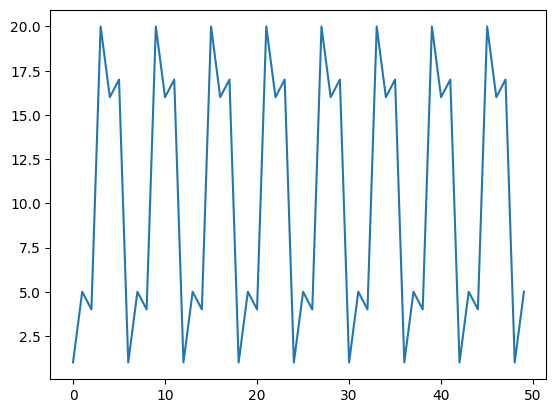

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = 5
N = 21
xs = []
for i in range(50): xs.append(pow(x, i, N))
plt.plot(xs)
plt.show()

To check out our solution, run the next cell:

In [3]:
SolutionToTask1()  # show solution for task 1

<IPython.core.display.Javascript object>

We do not know any classical algorithm solving this problem in polynomial time in the input size (the number of bits specifying the inputs ≈ $ \log N $).

On the other hand, it can be solved efficiently by using the phase estimation algorithm.

## Idea

The pair $ (N,x) $ is given, where $ 1 < x < N $ and $ gcd(N,x) = 1 $ (they do not have any common factor greater than 1).

Let $ L= \big \lceil  \log N \big \rceil $

Then, $ U_x $ is a classical reversible (and so quantum) operator which maps $ U_x \ket{y} \rightarrow \ket{xy {\Mod{N}}}$ where $y \in \{ 0, 1\}^L$ and $ 0 \leq  y\leq N-1 $.

We assume that $U \ket{y} = \ket{y}$ if $N \leq y \leq {2^L} - 1$.

Even though we do not know the value of order $ r $, we know that $ U_x $ has some eigenvectors with eigenvalues having $ r $ as a part of phase. Thus, we may use phase estimation algorithm to find $ r $.

<h3>Task 2 (on paper)</h3>

Let $\ket{v_0}=\ket{1 \Mod{N}}+\ket{x\Mod{N}}+\ket{x^2\Mod{N}}+ \cdots + \ket{x^{r-1}\Mod{N}}$.

Verify that $ \ket{v_0} $ is an eigenvector of $ U_x $ with eigenvalue 1.

Let $ \omega = e^{2 \pi i /r} $.

We define $\ket{v_1}=\ket{1 \Mod{N}}+ \omega^{-1}\ket{x\Mod{N}}+\omega^{-2}\ket{x^2\Mod{N}}+ \cdots + \omega^{-(r-1)}  \ket{x^{r-1}\Mod{N}}$

Verify that $ \ket{v_1} $ is also an eigenvector of $ U_x $ with eigenvalue $ \omega $.

To check out our solution, run the next cell:

In [ ]:
SolutionToTask2()  # show solution for task 2

## A special set of eigenvectors

Here are $ r $ eigenvectors of $ U_x $, where $ \omega = e^{\frac{2 \pi i}{r}} $.

$
    \begin{array}{rcl}
    \ket{u_0} & = &
        \dfrac{1}{\sqrt{r}} \mypar{
        \dfrac{ \ket{1 \Mod{N}} }{\omega^0}+
        \dfrac{ \ket{x \Mod{N}} }{\omega^0}+
        \dfrac{ \ket{x^2\Mod{N}} }{\omega^0}+ \cdots +
        \dfrac{ \ket{x^{r-1}\Mod{N}} }{\omega^0}
        }  \\
    \ket{u_1} & = &
        \dfrac{1}{\sqrt{r}} \mypar{
        \dfrac{ \ket{1 \Mod{N}} }{\omega^0}+
        \dfrac{ \ket{x \Mod{N}} }{\omega^1}+
        \dfrac{ \ket{x^2\Mod{N}} }{\omega^2}+ \cdots +
        \dfrac{ \ket{x^{r-1}\Mod{N}} }{\omega^{r-1}}
        }  \\
    \ket{u_2} & = &
        \dfrac{1}{\sqrt{r}} \mypar{
        \dfrac{ \ket{1 \Mod{N}} }{\omega^0}+
        \dfrac{ \ket{x \Mod{N}} }{\omega^2}+
        \dfrac{ \ket{x^2\Mod{N}} }{\omega^4}+ \cdots +
        \dfrac{ \ket{x^{r-1}\Mod{N}} }{\omega^{2(r-1)}}
        }  \\
        \vdots ~~~ & \vdots & ~~~~~~~~~~~~~~ \vdots \\
     \ket{u_{r-1}} & = &
        \dfrac{1}{\sqrt{r}} \mypar{
        \dfrac{ \ket{1 \Mod{N}} }{\omega^{0}}+
        \dfrac{ \ket{x \Mod{N}} }{\omega^{r-1}}+
        \dfrac{ \ket{x^2\Mod{N}} }{\omega^{2(r-1)}}+ \cdots +
        \dfrac{ \ket{x^{r-1}\Mod{N}} }{\omega^{(r-1)(r-1)}}
        }  \\
    \end{array}
$

Here each $ \ket{u_s} $ is an eigenvector of $ U_x $ with eigenvalue $ \omega^s = e^{ \frac{2 \pi i s}{r}} $, where  ($ 0 \leq s \leq r-1 $):

$
\begin{array}{rcl}
    U_x \ket{u_s} & = & U_x \dfrac{1}{\sqrt{r}} \mypar{
        \dfrac{ \ket{1 \Mod{N}} }{\omega^{0}}+
        \dfrac{ \ket{x \Mod{N}} }{\omega^{s}}+
        \dfrac{ \ket{x^2\Mod{N}} }{\omega^{2s}}+ \cdots +
        \dfrac{ \ket{x^{r-1}\Mod{N}} }{\omega^{(r-1)s}} } \\
        & = & \dfrac{1}{\sqrt{r}} \mypar{
        \dfrac{ \ket{x \Mod{N}} }{\omega^{0}}+
        \dfrac{ \ket{x^2 \Mod{N}} }{\omega^{s}}+
        \dfrac{ \ket{x^3\Mod{N}} }{\omega^{2s}}+ \cdots +
        \dfrac{ \ket{x^{r}\Mod{N}} }{\omega^{(r-1)s}} } \\
        & = & \dfrac{1}{\sqrt{r}} \mypar{
        \dfrac{ \ket{1 \Mod{N}} }{\omega^{(r-1)s}}+
        \dfrac{ \ket{x \Mod{N}} }{\omega^{0}}+
        \dfrac{ \ket{x^2\Mod{N}} }{\omega^{s}}+ \cdots +
        \dfrac{ \ket{x^{r-1}\Mod{N}} }{\omega^{(r-2)s}} } \\
        & = & \dfrac{\omega^s}{\sqrt{r}} \mypar{
        \dfrac{ \ket{1 \Mod{N}} }{\omega^{rs}}+
        \dfrac{ \ket{x \Mod{N}} }{\omega^{s}}+
        \dfrac{ \ket{x^2\Mod{N}} }{\omega^{2s}}+ \cdots +
        \dfrac{ \ket{x^{r-1}\Mod{N}} }{\omega^{(r-1)s}} } \\
        & = & \dfrac{\omega^s}{\sqrt{r}} \mypar{
        \dfrac{ \ket{1 \Mod{N}} }{\omega^{0}}+
        \dfrac{ \ket{x \Mod{N}} }{\omega^{s}}+
        \dfrac{ \ket{x^2\Mod{N}} }{\omega^{2s}}+ \cdots +
        \dfrac{ \ket{x^{r-1}\Mod{N}} }{\omega^{(r-1)s}} } \\
        & = & \omega^s \ket{u_s}
\end{array}
$

Remark that each $ \ket{u_s} $ has length 1 and so a quantum state. Besides, they are pairwise orthonormal.

Information about $ r $ is encoded inside the eigenvalues of the operator $ U_x $ and we will use phase estimation algorithm to estimate $ \frac{s}{r} $. In order to apply phase estimation algorithm, we need to prepare the second register to hold state $ \ket{u_s} $,  but there is a problem. The eigenvector has the variable $ r $ while our aim is to find $ r $. How will we prepare the eigenvector?

Instead, we will prepare a superposition of these eigenvectors $\displaystyle \frac{1}{\sqrt{r}}\sum_{s=0}^{r-1}\ket{u_s}$.

<h3>Task 3 (on paper)</h3>

Show that $\displaystyle \frac{1}{\sqrt{r}}\sum_{s=0}^{r-1}\ket{u_s}= \ket{1}$.

To check out our solution, run the next cell:

In [ ]:
SolutionToTask3()  # show solution for task 3

## Input vector

Suppose that phase estimation algorithm takes state $\ket{0}\ket{u}$ to state $\ket{\tilde{\phi_u}}\ket{u}$. In this case given input $\ket{0} \sum_{u} c_u \ket{u}$, algorithm outputs $\sum_{u} c_u\ket{\tilde{\phi_u}}\ket{u}$.

If $ t $ is chosen as previously, then it can be proven that the probability of measuring $\phi_u$ accurate to $ n $ bits is at least $|c_u|^2(1- \epsilon)$.

Hence by combining this with Task 2, we can prepare the second register to hold state $\ket{1}$ at the beginning of the algorithm.

<h2>Procedure </h2>

We use two registers with $ t $ and $ L $ qubits.

We pick $ t = 2L + 1 + \big \lceil \log \big(2 + \frac{1}{2\epsilon}\big) \big \rceil  $. (Choice of $ t $ will become clear later on.)

1) Initialize the registers as

$\displaystyle \ket{\psi_0} = \frac{1}{\sqrt{r}}\sum_{s=0}^{r-1}\ket{0}\ket{u_s} =\ket{0}\ket{1} .$


Note that here by $ \ket{0} $, we denote $ \ket{0}^{\otimes t} $ and by $ \ket{1} $ we denote $ \ket{0}^{L-1}\ket{1} $.


2) Apply $ H $ and $ CU^{2^j} $ gates in the phase estimation algorithm.

$ \displaystyle
		\ket{\psi_1}=\frac{1}{\sqrt{r}}\sum_{s=0}^{r-1}\frac{1}{{2^{t/2}}}\sum_{k=0}^{{2^t}-1}e^{\frac{2{\pi}i s k}{r}}\ket{k}\ket{u_s}
$


3) Apply Inverse QFT to the first register.

$\displaystyle
		\frac{1}{\sqrt{r}}\sum_{s=0}^{r-1}\ket{\tilde{\phi}}\ket{u_s}
$

4) Measure the first register ($t$ qubits).

For each $ s $ in the range $ 0,\ldots, r-1 $, we obtain an estimate of the phase $\tilde{\phi} = \frac{s}{r}$ accurate to $ 2L+1 $ bits with probability at least $ \frac{1-\epsilon}{r} $.

Note that if $r$ is not a power of 2, then it can not be expressed in the form $\frac{x}{N}$ for some $ x $ and $ N=2^t $.


5) Do post-processing by using classical computer.

Now the question is how to find $ r $ from the estimate of $ s/r $?

The answer is using continued fractions.

<h2>Continued Fractions</h2>

Continued fractions is a representation of a real number by a sequence of (possibly infinite) integers by using expressions of the form:

$
	[a_0,...a_n] = a_0 + \frac{1}{a_1 + \frac{1}{a_2 + \frac{1}{...}}}.
$


The rationals $a_0,a_0+\frac{1}{a_1},a_0+\frac{1}{a_1+\frac{1}{a_2}},...$ are called the convergents. All convergents  can be found using $O(L^3)$ operations where $ L $ is the number of bits needed to express $ m $ and $ n $ in $ \frac{m}{n} $.


### Example

$\frac{25}{11}$  can be expressed as $\frac{25}{11}=2+\frac{3}{11}$. Continuing like this,

\begin{align*}
		=2+\frac{1}{3+\frac{2}{3}} = 2+\frac{1}{3+\frac{1}{\frac{3}{2}}}
		\end{align*}
        
        

The resulting expression will be

\begin{align*}
2+\frac{1}{3+\frac{1}{1 + \frac{1}{2}}}
\end{align*}

with the continued fraction expression $[2,3,1,2]$.


The convergents are $c_1=2$, $c_2=2 + \frac{1}{3} = \frac{7}{3} $, $c_3 = 2 + \frac{1}{3 + \frac{1}{1}} = \frac{9}{4}$, $c_4 = 2+ \frac{ 1}{3 + \frac{1}{1 + \frac{1}{2}}} = \frac{25}{11}$

We defined two functions to calculate continued fractions expression and the convergents, which will be useful in the following tasks.

- <i>contFrac</i> takes a parameter $N$ and returns the continued fractions expressions of $N$ as a list
- <i>convergents</i> takes as paremeter the continued fractions expression and returns the list of convergents

Run the following cell to load the functions.

In [5]:
quantum_file = path_files+"shor.py"
%run $quantum_file

<Figure size 640x480 with 0 Axes>

Below you see example usage of <i>contFrac</i> and <i>convergents</i> methods.

In [6]:
cf = contFrac(25/11)
print(cf)

[2, 3, 1, 2]


In [7]:
cv = convergents(cf)
print(cv)

[Fraction(2, 1), Fraction(7, 3), Fraction(9, 4), Fraction(25, 11)]


In [8]:
cv = convergents([1,4,2,1])
print(cv)

[Fraction(1, 1), Fraction(5, 4), Fraction(11, 9), Fraction(16, 13)]


<h3>Task 4</h3>

Find the continued fractions expression for $\frac{31}{13}$ and the convergents first using pen and paper and then using the functions defined above.

In [9]:
#Your code here
cf = contFrac(31/13)
print(cf)
cv = convergents(cf)
print(cv)

[2, 2, 1, 1, 2]
[Fraction(2, 1), Fraction(5, 2), Fraction(7, 3), Fraction(12, 5), Fraction(31, 13)]


To check out our solution, run the next cell:

In [ ]:
SolutionToTask4()  # show solution for task 4

### Choice of t (optional)

Following theorem guarantees that the continued fractions algorithm yields a good estimate for $\phi$.

<b>Theorem:</b> 	Suppose $\frac{s}{r}$ is a rational number so that  $\displaystyle\left |\frac{s}{r}-\phi \right | \leq \frac{1}{2r^2}$. Then $\displaystyle \frac{s}{r}$ is a convergent of the continued fraction for $\phi$, and thus can be computed in $O(L^3)$ operations, using continued fraction algorithm.

Remember that $\phi$ is an approximation to $\frac{s}{r}$ accurate to $2L+1$ bits due to our choice of $t$. Since $r\leq N \leq 2^L$, we get $
\left |\frac{s}{r}-\phi \right | \leq \frac{1}{2^{2L+1}} \leq \frac{1}{2r^2}. $


Now according to the theorem, $\frac{s}{r}$ is a convergent of the continued fraction for $\phi$.

    

Computing the convergents we have candidate values for $s$ and $r$ and then we can test if $x^r=1 \Mod{N}$. (Remember that we have more than one convergent and we compute each one of them but not all of them will give us the correct $r$ value. So it might be the case that we fail in some cases)

<h2> Modular Exponentiation</h2>

In the phase estimation procedure, we have assumed that we were given operators $U$, $CU$ and their powers as blackbox functions. In reality, $ CU^{2^j} $ operators should be implemented efficiently to have a speedup against the classical algorithm.

Note that to compute $x^{2^j}$, you don't need to perform $2^j$ multiplications. Once you obtain $x^2$, you can obtain $x^4$, $x^8$ so that you need only log$j$ multiplications. Nevertheless, multiplication involves implementation of addition and carries.

The important thing is that it can be performed using $ O(L^3) $ gates by using a procedure known as modular exponentiation. This is a technical procedure and instead we will continue implementing $ CU^{2^j} $ operators with the built-in functionality of $Cirq$.

_More details about modular exponentiation can be found in https://arxiv.org/pdf/1207.0511.pdf._

<a id ="task5"></a>
<h3>Task 5</h3>

You are given a function named `opUx` which returns the gate implementing $ U_x \ket{y} \rightarrow \ket{xy {\Mod{N}}}$.

In [10]:
import cirq
import numpy as np

def opUx(N, x):

    k = 1
    while(N > 2**k):
        k = k + 1

    u = np.zeros([2**k, 2**k], dtype = int)

    for i in range(N):
        u[x*i % N][i] = 1
    for i in range(N, 2**k):
        u[i][i] = 1

    return cirq.MatrixGate(u, name='Ux').controlled()


In [11]:
from cirq.circuits import InsertStrategy

def myInvQFT(qubits):
  N = len(qubits)
  circuit = cirq.Circuit()
  for i in range(N // 2):
    circuit.append(cirq.SWAP(qubits[i], qubits[N-1-i]), strategy = InsertStrategy.NEW)
  for i in range(N-1, -1, -1):
    phase_divisor = 2 ** (N-i)
    for j in range(N-1, i, -1):
      circuit.append(cirq.CZPowGate(exponent = -2 / phase_divisor).on(qubits[j], qubits[i]), strategy = InsertStrategy.NEW)
      phase_divisor = phase_divisor / 2
    circuit.append(cirq.H(qubits[i]), strategy = InsertStrategy.NEW)
  return circuit

_In order to use the function you should pass $N$ and $x$ as parameter: `Ux = opUx(N, x)`._

For $N=20$ and $x=3$, use phase estimation procedure to find the estimates for $\frac{s}{r}$.

Pick the correct values for $t$ and $L$.

Use `myInvQFT` function you have already implemented [here](https://colab.research.google.com/drive/1C0_tK9KD7iHrsmwqdsHtG6i_J0CYs85o?usp=sharing#scrollTo=leUvkPgoA7mb).

Detect the outcomes with peak frequencies (will be used in the next task).

In [12]:
#
# Your code here
#
from math import ceil, log2, pi
N = 20
x = 3
L = ceil(log2(N))
e = 0.1
t = 2*L + 1 + ceil(log2(2 + 1/(2*e)))

In [14]:
from cirq import X, measure

circuit = cirq.Circuit()

reg1 = cirq.LineQubit.range(t)
reg2 = cirq.LineQubit.range(t, t+L)

circuit.append(cirq.H.on_each(*reg1))
circuit.append(cirq.X(reg2[-1]))

Ux = opUx(N, x)

for j in range(t):
  Uxj = Ux**(2**j)
  circuit.append(Uxj(reg1[t-j-1], *reg2))

circuit = circuit + myInvQFT(reg1)
circuit.append(measure(*reg1, key='result'))

sim = cirq.Simulator()
samples = sim.run(circuit, repetitions = 1000)

def bitstring(bits):
  return "".join(str(int(b)) for b in bits)

print(samples.histogram(key = 'result', fold_func = bitstring))
outcomes = samples.histogram(key = 'result')
print(outcomes)

check = []
for outcome in outcomes:
  print(f"{outcome} \tobserved {outcomes[outcome]} times")
  check.append(outcome)
print(check)

Counter({'10000000000000': 259, '11000000000000': 250, '00000000000000': 247, '01000000000000': 244})
Counter({8192: 259, 12288: 250, 0: 247, 4096: 244})
0 	observed 247 times
4096 	observed 244 times
8192 	observed 259 times
12288 	observed 250 times
[0, 4096, 8192, 12288]


To check out our solution, run the next cell:

In [ ]:
SolutionToTask5()  # show solution for task 5

<a id ="task6"></a>
<h3>Task 6</h3>

For each one of the possible outcomes in Task 5, try to find out the value of $r$ using continued fractions algorithm.

You can use the functions defined above.

In [16]:
#
# Your code here
#
for outcome in check:
  cf = contFrac(outcome/(2**t))
  cv = convergents(cf)
  print(f"{outcome} \t {cv}")

0 	 [Fraction(0, 1)]
4096 	 [Fraction(0, 1), Fraction(1, 4)]
8192 	 [Fraction(0, 1), Fraction(1, 2)]
12288 	 [Fraction(0, 1), Fraction(1, 1), Fraction(3, 4)]


To check out our solution, run the next cell:

In [ ]:
SolutionToTask6()  # show solution for task 6

<h2>Remarks about the algorithm</h2>

The algorithm might produce a bad estimate to $\frac{s}{r}$ which occurs with probability at most $ \epsilon $. We can decrease $ \epsilon $ with the cost of increasing the size of the circuit.

The numbers $s$ and $r$ may have a common factor, and we may get $r'$ (which is a factor of $r$) instead of $r$. Nevertheless, the number of primes which are less than $r$ is at least $\frac{r}{2}\log r$. With a constant number of repetitions of the algorithm, one can obtain $s$ and $r$ which are relatively prime with high probability.

Overall, we have an algorithm which uses $O(L^3)$ gates, $ O(L) $ qubits and constant repetitions.
- Hadamard operation at the beginning requires $ O(L) $ gates
- $ O(L^2) $ gates are required by $QFT^\dagger $
- $ O(L^3) $ gates are needed for modular exponentiation
- Continued fraction algorithm requires $ O(L^3) $ classical processing

The best classical algorithm for order finding is of exponential time while we have a polynomial size quantum circuit for order finding.